### import the packages and the data

In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('D:/Sampledata/bank-additional.csv', sep = ";")

### UDF's

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [7]:
# create user defined function to create the freq plots
def fn_countplot(pd_series):
    plt.figure(figsize = (5, 3))
    sns.countplot(y = pd_series)
    print('This is a freq chart for ' + pd_series.name)
    plt.show()
    return

### data inspection

In [8]:
# meta data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [9]:
# create pandas profiling report
profilereport = pandas_profiling.ProfileReport(data)
profilereport.to_file('profilereport.html')

In [10]:
# summaries of continuous variables
data.select_dtypes(['float64', 'int64']).apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4119.0,0.0,1.652280e+05,40.113620,38.000,10.313362,106.365426,18.000,24.000,26.0000,28.800,32.000,38.000,47.000,55.000,58.000,68.000,88.000
duration,4119.0,0.0,1.057710e+06,256.788055,181.000,254.703736,64873.993194,0.000,11.000,35.0000,60.000,103.000,181.000,317.000,545.200,740.200,1231.660,3643.000
campaign,4119.0,0.0,1.045100e+04,2.537266,2.000,2.568159,6.595442,1.000,1.000,1.0000,1.000,1.000,2.000,3.000,5.000,7.000,13.000,35.000
pdays,4119.0,0.0,3.955979e+06,960.422190,999.000,191.922786,36834.355710,0.000,3.000,999.0000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,4119.0,0.0,7.840000e+02,0.190337,0.000,0.541788,0.293535,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,6.000
emp.var.rate,4119.0,0.0,3.500000e+02,0.084972,1.100,1.563114,2.443327,-3.400,-3.400,-2.9000,-1.800,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,4119.0,0.0,3.854548e+05,93.579704,93.749,0.579349,0.335645,92.201,92.201,92.7130,92.893,93.075,93.749,93.994,94.465,94.465,94.601,94.767
cons.conf.idx,4119.0,0.0,-1.668158e+05,-40.499102,-41.800,4.594578,21.110142,-50.800,-50.000,-47.1000,-46.200,-42.700,-41.800,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,4119.0,0.0,1.491636e+04,3.621356,4.857,1.733591,3.005339,0.635,0.677,0.8084,1.029,1.334,4.857,4.961,4.964,4.966,4.968,5.045
nr.employed,4119.0,0.0,2.128074e+07,5166.481695,5191.000,73.667904,5426.960015,4963.600,4963.600,5008.7000,5076.200,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


In [11]:
# summaries of object variables
data.select_dtypes(['object']).apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
job,4119,0,admin.,1012,24.57
marital,4119,0,married,2509,60.91
education,4119,0,university.degree,1264,30.69
default,4119,0,no,3315,80.48
housing,4119,0,yes,2175,52.8
loan,4119,0,no,3349,81.31
contact,4119,0,cellular,2652,64.38
month,4119,0,may,1378,33.45
day_of_week,4119,0,thu,860,20.88
poutcome,4119,0,nonexistent,3523,85.53


In [12]:
# Labelling y column to 1, 0 values which is orginally stored as yes,no
data['y'] = data['y'].str.lower().replace({'yes': 1, 'no': 0})

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [14]:
# get the dummy variables
for c_feature in data.select_dtypes(['object']).columns:
    data = create_dummies(data, c_feature)

In [15]:
data.shape

(4119, 54)

In [16]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

##### Feature Selection
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [17]:
# import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [18]:
# get the y and X varaibales
y_var = 'y'
X_var = data.columns.difference(['y'])

In [19]:
# RFE
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(data[X_var], data[y_var])

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False False False False False
 False False False False False False  True False  True  True False  True
  True False  True  True  True  True False False False False  True False
 False False False False  True  True  True  True  True False False  True
 False False  True  True  True]
[30 10 14 16  1 17 34 18  3 27 33 29 12 15  6 25 23 24  1 11  1  1  2  1
  1 28  1  1  1  1 21 20  4 26  1  7  8  9 31 13  1  1  1  1  1  5 19  1
 22 32  1  1  1]


In [20]:
X_final = data[X_var[rfe.support_]]
y_final = data['y']

### Build the model



In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, 
                                                    test_size = 0.3, random_state = 12345)

#### Naive Bayesian

In [22]:
# import the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics 

*GaussianNB: When independent variables include continous* <br>
*BernoulliNB: When data consists of binary categorical independent vars* <br>
*MultinomialNB: When data consists of categorical independent vars*

In [26]:
# build the NB model
nb_clf = GaussianNB()
nb_clf.fit(X_final, y_final)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
# get the model accuracy
print(metrics.accuracy_score(y_train, nb_clf.predict(X_train)))
print(metrics.accuracy_score(y_test, nb_clf.predict(X_test)))

0.8806798473812001
0.8737864077669902


In [32]:
# get the probability score on training and testing
train_predict_prob = pd.DataFrame(nb_clf.predict(X_train))
test_predict_prob = pd.DataFrame(nb_clf.predict(X_test))

In [33]:
# get the model auc
print(metrics.roc_auc_score(y_train, train_predict_prob))
print(metrics.roc_auc_score(y_test, test_predict_prob))

0.6545022993621125
0.6681149732620321


In [34]:
# confusion matrix
nb_cm = metrics.confusion_matrix( y_test, nb_clf.predict( X_test ))

Text(0.5, 12.5, 'Predicted label')

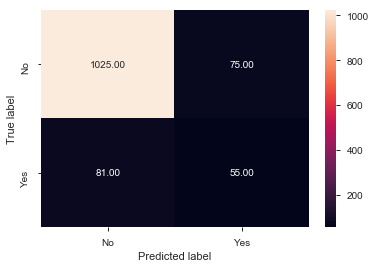

In [35]:
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [36]:
MultinomialNB?